In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import Nio
print (Nio.__version__)
import seaborn as seabornInstance
from scipy import stats
import sklearn

print("python version:")
import platform
print(platform.python_version())

1.5.5
python version:
3.7.3


In [3]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

# Load Data

In [4]:
from netCDF4 import Dataset
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num

In [6]:
airi_dat = xr.open_dataset("pALLIN.nc", decode_times=False)
units, reference_date = airi_dat.time.attrs['units'].split('since')
airi_dat['time'] = pd.date_range(start=reference_date, periods=airi_dat.sizes['time'], freq='MS')
precip = airi_dat['precip']

In [12]:
#Get precip anomalies
precip_clim = precip.groupby("time.month").mean("time")
precip_anomfull = precip.groupby("time.month") - precip_clim

In [68]:
precip_subset1 = precip.sel(time=slice('1900-01-01','1901-12-31'))
precip_subset2 = precip.sel(time=slice('1903-01-01','1906-12-31'))
precip_subset3 = precip.sel(time=slice('1908-01-01','1911-12-31'))
precip_subset4 = precip.sel(time=slice('1913-01-01','1913-12-31'))
precip_subset5 = precip.sel(time=slice('1915-01-01','1918-12-31'))
precip_subset6 = precip.sel(time=slice('1920-01-01','1921-12-31'))
precip_subset7 = precip.sel(time=slice('1923-01-01','1927-12-31'))
precip_subset8 = precip.sel(time=slice('1929-01-01','1931-12-31'))
precip_subset9 = precip.sel(time=slice('1934-01-01','1939-12-31'))
precip_subset10 = precip.sel(time=slice('1941-01-01','1948-12-31'))
precip_subset11 = precip.sel(time=slice('1951-01-01','1955-12-31'))
precip_subset12 = precip.sel(time=slice('1957-01-01','1958-12-31'))
precip_subset13 = precip.sel(time=slice('1960-01-01','1962-12-31'))
precip_subset13 = precip.sel(time=slice('1964-01-01','1965-12-31'))
precip_subset14 = precip.sel(time=slice('1967-01-01','1971-12-31'))
precip_subset15 = precip.sel(time=slice('1973-01-01','1976-12-31'))
precip_subset16 = precip.sel(time=slice('1978-01-01','1979-12-31'))
precip_subset17 = precip.sel(time=slice('1981-01-01','1982-12-31'))
precip_subset18 = precip.sel(time=slice('1984-01-01','1991-12-31'))
precip_subset19 = precip.sel(time=slice('1993-01-01','1998-12-31'))
precip_subset20 = precip.sel(time=slice('2000-01-01','2002-12-31'))
precip_subset21 = precip.sel(time=slice('2004-01-01','2006-12-31'))
precip_subset22 = precip.sel(time=slice('2008-01-01','2010-12-31'))
precip_subset23 = precip.sel(time=slice('2012-01-01','2015-12-31'))

precip_anom = xr.merge([precip_subset1, precip_subset2, precip_subset3, precip_subset4, precip_subset5, 
                   precip_subset6, precip_subset7, precip_subset8, precip_subset9, precip_subset10, 
                   precip_subset11, precip_subset12, precip_subset13, precip_subset14, precip_subset15, 
                   precip_subset16, precip_subset17, precip_subset18, precip_subset19, precip_subset20, 
                   precip_subset21, precip_subset22, precip_subset23])
precip_anomtemp = xr.Dataset.to_array(precip_anom)
precip_anom = precip_anom['precip']
print(precip_anom)
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.DataArray 'precip' (time: 1056)>
array([  2.6,  15.3,   6.7, ..., 125.9,  36.6,  44.3], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
Attributes:
    long_name:  ALL-INDIA  RAINFALL
    units:      mm/mo


In [69]:
#Load SST data
dataset_url = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc"
sst_dat = xr.open_dataset(dataset_url)
sst = sst_dat['sst']

In [8]:
#Slice SST data to the same duration as precip and calculate monthly anomalies
sst_subset = sst.sel(time=slice('1871-01-30','2017-01-01'))
sst_clim = sst_subset.groupby('time.month').mean('time')
sst_anomfull = sst_subset.groupby("time.month")-sst_clim
sst_anomfull

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (time: 1752, lat: 89, lon: 180)>
array([[[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       ...,

       [[3.152323e-02, 2.609873e-02, ..., 2.140296e-02, 3.102016e-02],
        [2.697122e-02, 1.542413e-02, ..., 1.046002e-02, 2.427316e-02],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-

In [9]:
sst_subset1 = sst_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
sst_subset2 = sst_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
sst_subset3 = sst_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
sst_subset4 = sst_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
sst_subset5 = sst_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
sst_subset6 = sst_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
sst_subset7 = sst_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
sst_subset8 = sst_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
sst_subset9 = sst_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
sst_subset10 = sst_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
sst_subset11 = sst_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
sst_subset12 = sst_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
sst_subset14 = sst_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
sst_subset15 = sst_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
sst_subset16 = sst_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
sst_subset17 = sst_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
sst_subset18 = sst_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
sst_subset19 = sst_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
sst_subset20 = sst_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
sst_subset21 = sst_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
sst_subset22 = sst_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
sst_subset23 = sst_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

sst_anomtemp = xr.merge([sst_subset1, sst_subset2, sst_subset3, sst_subset4, sst_subset5, 
                   sst_subset6, sst_subset7, sst_subset8, sst_subset9, sst_subset10, 
                   sst_subset11, sst_subset12, sst_subset13, sst_subset14, sst_subset15, 
                   sst_subset16, sst_subset17, sst_subset18, sst_subset19, sst_subset20, 
                   sst_subset21, sst_subset22, sst_subset23])
#sst_anom = xr.Dataset.to_array(sst_anomtemp).drop('variable')
print(sst_anomtemp)
sst_anom = sst_anomtemp['sst']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    sst      (time, lat, lon) float32 1.7881393e-06 1.7881393e-06 ... nan nan


In [10]:
#Load SLP data
dataset_url = "/global/scratch/medhap02/ISMData/prmsl.mon.mean.nc"
slp_dat = xr.open_dataset(dataset_url)
slp = slp_dat['prmsl']

In [11]:
#Slice SLP data to the same duration as precip and calculate monthly anomalies
slp_subset = slp.sel(time=slice('1871-01-01','2015-12-31'))
slp_clim = slp_subset.groupby('time.month').mean('time')
slp_anomfull = slp_subset.groupby("time.month")-slp_clim
slp_anomfull

<xarray.DataArray 'prmsl' (time: 1740, lat: 181, lon: 360)>
array([[[  114.765625,   114.765625, ...,   114.765625,   114.765625],
        [   94.78125 ,    94.46875 , ...,    95.359375,    95.03125 ],
        ...,
        [  293.65625 ,   293.95312 , ...,   293.20312 ,   293.4297  ],
        [  288.66406 ,   288.66406 , ...,   288.66406 ,   288.66406 ]],

       [[   75.84375 ,    75.84375 , ...,    75.84375 ,    75.84375 ],
        [   67.66406 ,    68.02344 , ...,    66.85156 ,    67.24219 ],
        ...,
        [  587.2969  ,   587.52344 , ...,   586.9219  ,   587.0781  ],
        [  581.14844 ,   581.14844 , ...,   581.14844 ,   581.14844 ]],

       ...,

       [[ -876.5703  ,  -876.5703  , ...,  -876.5703  ,  -876.5703  ],
        [ -937.10156 ,  -936.8594  , ...,  -937.625   ,  -937.3906  ],
        ...,
        [-1008.4375  , -1008.8906  , ..., -1007.5625  , -1007.9922  ],
        [-1047.0938  , -1047.0938  , ..., -1047.0938  , -1047.0938  ]],

       [[ -525.5     ,  -525.5

In [21]:
slp_subset1 = slp_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
slp_subset2 = slp_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
slp_subset3 = slp_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
slp_subset4 = slp_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
slp_subset5 = slp_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
slp_subset6 = slp_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
slp_subset7 = slp_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
slp_subset8 = slp_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
slp_subset9 = slp_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
slp_subset10 = slp_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
slp_subset11 = slp_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
slp_subset12 = slp_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
slp_subset13 = slp_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
slp_subset13 = slp_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
slp_subset14 = slp_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
slp_subset15 = slp_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
slp_subset16 = slp_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
slp_subset17 = slp_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
slp_subset18 = slp_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
slp_subset19 = slp_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
slp_subset20 = slp_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
slp_subset21 = slp_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
slp_subset22 = slp_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
slp_subset23 = slp_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

slp_anomtemp = xr.merge([slp_subset1, slp_subset2, slp_subset3, slp_subset4, slp_subset5, 
                   slp_subset6, slp_subset7, slp_subset8, slp_subset9, slp_subset10, 
                   slp_subset11, slp_subset12, slp_subset13, slp_subset14, slp_subset15, 
                   slp_subset16, slp_subset17, slp_subset18, slp_subset19, slp_subset20, 
                   slp_subset21, slp_subset22, slp_subset23])
#slp_anom = xr.Dataset.to_array(slp_anomtemp).drop('variable')
print(slp_anomtemp)
slp_anom = slp_anomtemp['prmsl']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    prmsl    (time, lat, lon) float32 24.570312 24.570312 ... -411.48438


In [70]:
junes = np.arange(5,1056,12)
julys = np.arange(6,1056,12) #1752 instead of 1068
augusts = np.arange(7,1056, 12)
septembers = np.arange(8,1056,12)
precipa_june = precip_anom[junes]
precipa_july = precip_anom[julys]
precipa_august = precip_anom[augusts]
precipa_september = precip_anom[septembers]

precipa_july.time.data = precipa_june.time.data
precipa_august.time.data = precipa_june.time.data
precipa_september.time.data = precipa_june.time.data

precipa_jjas = (precipa_june + precipa_july + precipa_august + precipa_september)

# Building Predictors

In [15]:
#EP-ENSOpredictor

#DSST1
latrange1 = sst_anom.sel(lat = slice(5, -20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst_anom.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst_anom['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(5, -20), lon = slice(150, 170), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
DSST1 = maymean1 - marchmean1

#DSST2
latrange2 = sst_anom.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst_anom['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(250, 280), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
DSST2 = (maymean2 - marchmean2)

EPTinitial = DSST1 - DSST2
#print(EPTinitial)
EPTstd = EPTinitial.std()
EPTmean = EPTinitial.mean()
EPT = (EPTinitial - EPTmean)/EPTstd

In [16]:
print(EPT)

<xarray.DataArray (time: 88)>
array([-0.087031, -0.349395,  0.952161, -2.207361, -1.112206,  2.42138 ,
        1.067863, -0.055572,  0.374956, -1.817191,  0.379771, -0.832366,
        0.601817, -0.670612, -0.832157,  1.29451 , -0.546239, -0.765166,
        0.272546,  0.120034,  0.200123, -0.150773, -0.787937, -0.841457,
        1.517263,  0.159261, -1.528789, -0.047607,  0.57149 ,  0.927541,
       -1.434518, -0.188932,  2.12384 , -0.464264,  0.123852, -0.708544,
       -0.061771,  1.765358,  2.167504, -0.49596 ,  1.277148, -0.428457,
        1.862247,  0.526277, -1.026932, -0.470538,  2.056401, -1.692724,
       -0.349625, -0.254107, -0.779232,  0.113341, -0.013173,  1.063192,
       -0.792651,  0.983634, -0.862947,  0.71936 , -1.147233,  0.432044,
       -0.780704,  0.746544,  0.637105,  0.563633, -0.09354 ,  0.789095,
        0.220932, -0.381595, -0.322652, -1.073292, -0.43058 ,  1.040161,
        0.635711, -2.153529,  0.793171, -0.580328,  0.267886,  0.76092 ,
        0.679785, -1.

In [18]:
#CP-ENSOpredictor

#DSST1
latrange1 = sst_anom.sel(lat = slice(-10, -25)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = sst_anom.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst_anom['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(-10, -25), lon = slice(170, 200), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

aprilmean1.time.data = maymean1.time.data
DSST1 = maymean1 - aprilmean1

#DSST2
latrange2 = sst_anom.sel(lat = slice(20, 5)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = sst_anom.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst_anom['time.month']==4))
aprilSST2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean()
                          
maydata2 = sst_anom.sel(lat = slice(20, 5), lon = slice(180, 210), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()
                          
aprilmean2.time.data = maymean2.time.data
DSST2 = maymean2 - aprilmean2

CPTinitial = DSST1 - DSST2
#print(CPTinitial)
CPTstd = CPTinitial.std()
CPTmean = CPTinitial.mean()
CPT = (CPTinitial - CPTmean)/CPTstd

In [19]:
print(CPT)

<xarray.DataArray (time: 88)>
array([ 1.034446, -1.644795,  0.260865, -1.523214, -2.058889,  0.279677,
        0.520603,  1.476613, -2.861686, -0.120737,  1.58951 , -0.388673,
       -0.027112,  2.047418,  0.3757  , -2.200316,  0.330586,  0.319994,
        0.059772, -0.089702,  0.473585,  0.404069, -0.20933 , -0.375415,
        0.049273, -0.243741,  0.289054, -0.338636, -0.127177,  0.813011,
        1.631568, -0.410525,  0.048517,  1.325921,  0.397832, -1.561584,
       -0.733634,  0.632544, -1.80833 , -2.158612,  0.166518, -0.548333,
        0.10629 ,  0.632596,  0.460435,  0.484698,  1.546964, -1.403212,
       -0.420896,  0.689404, -0.674952,  2.048375,  0.677564, -0.983772,
       -0.169912,  0.553684, -0.01093 ,  1.495744,  0.917114, -0.158445,
       -0.07368 , -1.074418, -0.567051, -0.620656, -1.619773, -0.047012,
        0.628906,  2.138351, -0.738455, -0.077431, -0.415636,  0.498731,
       -1.319567, -0.649522,  2.0164  , -1.059239, -0.481311, -0.565523,
        0.49364 ,  0.

In [22]:
#mega-ENSOpredictor

#NPcalculation
latrange1 = slp_anom.sel(lat = slice(-40, -10)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = slp_anom.sel(lat = slice(-40, -10), lon = slice(200, 270), time = (slp_anom['time.month']==4))
aprilSLP1 = aprildata1.sel(time=slice('1900-04-01','2015-04-01'))
aprilmean1 = ((aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

maydata1 = slp_anom.sel(lat = slice(-40, -10), lon = slice(200, 270), time = (slp_anom['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = ((maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

aprilmean1.time.data = maymean1.time.data
NP = ((aprilmean1 + maymean1)/2)

#SPcalculation
latrange2 = slp_anom.sel(lat = slice(10, 30)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = slp_anom.sel(lat = slice(10, 30), lon = slice(180, 230), time = (slp_anom['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = ((aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = slp_anom.sel(lat = slice(10, 30), lon = slice(180, 230), time = (slp_anom['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = ((maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

aprilmean2.time.data = maymean2.time.data
SP = ((aprilmean2 + maymean2)/2)

NParea = (30*weights1.mean() * 70)
SParea = (20*weights2.mean() * 50)
PSHinitial = ((NP * NParea) + (SP * SParea))/(NParea + SParea)
#print(PSHinitial)
PSHstd = PSHinitial.std()
PSHmean = PSHinitial.mean()
PSH = (PSHinitial - PSHmean)/PSHstd

In [23]:
print(PSH)

<xarray.DataArray (time: 88)>
array([-2.005250e-01, -5.051098e-01, -6.125665e-01, -1.837063e+00,
       -1.866761e+00, -1.292742e+00, -2.470020e+00, -2.482490e-01,
       -1.102492e+00, -1.361715e+00, -1.361769e+00, -2.118574e+00,
       -1.986200e+00,  3.538084e-01, -5.215671e-01, -2.002871e+00,
       -1.004603e+00, -3.375509e-01, -5.135708e-01, -1.850341e-01,
       -2.298567e-01, -1.507822e-01, -3.283794e-01, -9.261173e-01,
       -6.347694e-01,  3.103731e-02, -8.884090e-01,  8.430255e-02,
        1.217063e-01,  1.566132e+00, -6.575921e-01,  8.822005e-01,
        5.166321e-01, -2.775873e-01,  7.746392e-01,  5.110298e-01,
        2.223698e-01, -1.147085e-01, -7.284263e-01, -1.242188e+00,
       -1.917778e-01, -1.029086e-01, -2.842865e-01,  1.487120e+00,
       -6.584970e-01, -7.160102e-01,  6.213269e-01, -1.220243e-03,
        3.113251e-01, -5.122090e-01, -1.128113e-01,  7.545597e-01,
        5.855645e-01,  1.186979e-01,  7.520196e-01,  7.556060e-01,
        6.702035e-01,  1.321372e

In [24]:
#AnomalousAsianLowpredictor

latrange = slp_anom.sel(lat = slice(40, 60)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = slp_anom.sel(lat = slice(40, 60), lon = slice(95, 125), time = (slp_anom['time.month']==3))
marchSLP = marchdata.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean = ((marchSLP*weights).mean({'lon', 'lat'})/weights.mean())

maydata = slp_anom.sel(lat = slice(40, 60), lon = slice(95, 125), time = (slp_anom['time.month']==5))
maySLP = maydata.sel(time = slice('1900-05-01', '2015-05-01'))
maymean = ((maySLP*weights).mean({'lon', 'lat'})/weights.mean())

marchmean.time.data = maymean.time.data
NATinitial = maymean - marchmean
#print(NATinitial)
NATstd = NATinitial.std()
NATmean = NATinitial.mean()
NAT = (NATinitial - NATmean)/NATstd

In [25]:
print(NAT)

<xarray.DataArray (time: 88)>
array([-1.068893,  0.755654, -0.12527 ,  0.599036, -1.890579, -0.034174,
        0.13958 , -0.239572,  0.238692,  0.437342,  0.731064, -0.502504,
       -1.75183 , -0.134084,  1.291167,  0.963258, -0.115369,  0.992072,
       -1.714047, -0.177566, -0.864392,  0.914149, -0.850064, -0.146981,
        1.098344, -0.23197 ,  0.951411, -2.40728 , -0.407965, -0.562247,
        0.41978 ,  1.46196 ,  1.423092, -0.093212, -0.260565, -0.936379,
        0.20943 , -0.958688,  0.570385,  0.110958,  0.948243,  0.556542,
       -1.239539, -0.332461, -1.195328,  0.850039,  1.538866, -0.598748,
        0.187332,  2.317948, -1.085157, -2.437565, -1.39872 ,  0.21747 ,
       -0.744242,  0.601322, -1.121179,  0.136418,  0.589953,  0.822986,
        0.286184, -0.687328, -1.442452,  0.29634 ,  0.310177, -0.831618,
        0.78558 ,  0.481044, -0.659407,  0.256803, -2.025287,  0.561287,
        0.551788, -0.220278,  0.124549,  0.427256,  0.631208,  3.402901,
        0.657332, -1.

In [75]:
rainfallstd = precipa_jjas.std()
rainfallmean = precipa_jjas.mean()

<xarray.DataArray 'precip' (time: 88)>
array([692.69995, 635.5    , 721.3    , 692.7    , 589.2    , 743.9    ,
       778.7    , 780.4    , 767.8    , 601.     , 737.5    , 662.69995,
       795.10004, 807.80005, 633.3    , 642.4    , 699.5    , 690.8    ,
       676.3    , 766.8    , 744.5    , 746.39996, 736.8    , 685.2    ,
       730.3    , 775.3    , 687.2    , 802.4    , 720.1    , 813.1    ,
       665.6    , 653.2    , 819.6    , 740.60004, 820.6    , 738.7    ,
       819.10004, 749.1    , 755.89996, 664.     , 739.7    , 779.69995,
       689.     , 773.4    , 716.9    , 735.30005, 764.1    , 601.3    ,
       724.5    , 651.4    , 715.8    , 790.5    , 797.69995, 776.2    ,
       668.3    , 775.5    , 745.4    , 799.5    , 608.7    , 712.2    ,
       664.8    , 733.2    , 656.19995, 673.     , 604.4    , 806.2    ,
       743.4    , 826.4    , 740.2    , 688.69995, 847.80005, 728.5    ,
       736.3    , 728.     , 689.5    , 740.4    , 739.     , 574.2    ,
       700.5

# Model Comparisons

In [72]:
AIRIoriginal = 0.47*EPT + 0.19*CPT + 0.23*PSH - 0.24*NAT
AIRInew = 0.39*EPT + 0.24*CPT + 0.11*PSH - 0.23*NAT

finaloriginal = (AIRIoriginal * rainfallstd) + rainfallmean
finalnew = (AIRInew * rainfallstd) + rainfallmean

precipa_jjas.time.data = finalnew.time.data

In [73]:
originalCorrelation = correlation(finaloriginal, precipa_jjas, dims='time')
newCorrelation = correlation(finalnew, precipa_jjas, dims='time')

print("original coefficients correlation to precipitation", originalCorrelation.data)
print("cross validation coefficients correlation to precipitation", newCorrelation.data)

original coefficients correlation to precipitation 0.5407150648679302
cross validation coefficients correlation to precipitation 0.5506092700944802


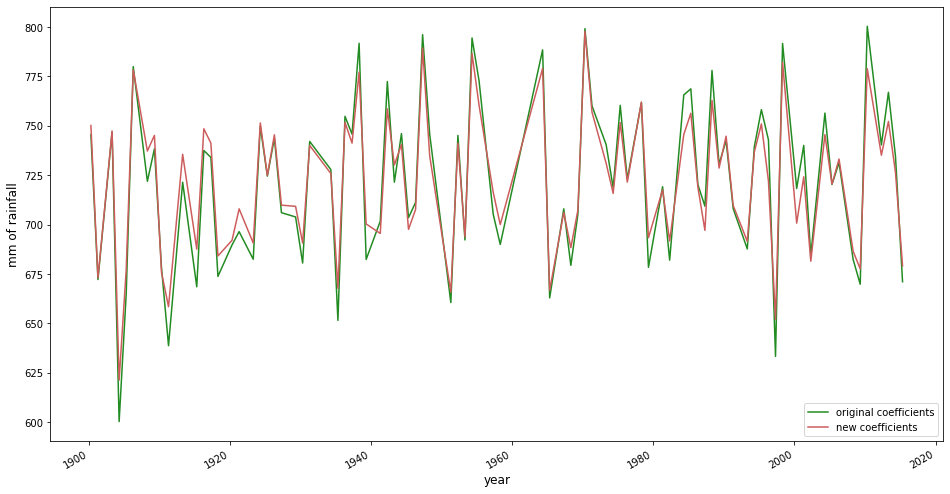

In [74]:
plt.figure(figsize=(16,8))
plt.title('Coefficient Comparisons', fontsize = 'xx-large')
finaloriginal.plot(label = 'original coefficients', color = 'forestgreen')
finalnew.plot(label = 'new coefficients', color = 'indianred')

plt.xlabel('year', fontsize = 'large')
plt.ylabel('mm of rainfall', fontsize = 'large')
plt.legend(loc='lower right')